In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xb
from sklearn.ensemble import AdaBoostClassifier
import pickle
from sklearn import datasets
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
df=pd.read_csv('Travel.csv')

In [3]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [5]:
df.shape

(4888, 20)

In [6]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [7]:
df.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [8]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

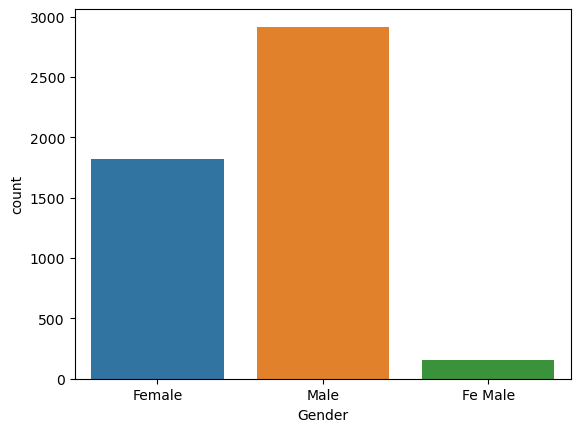

In [9]:
sns.countplot(data=df,x='Gender')

In [10]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

<Axes: xlabel='MaritalStatus', ylabel='count'>

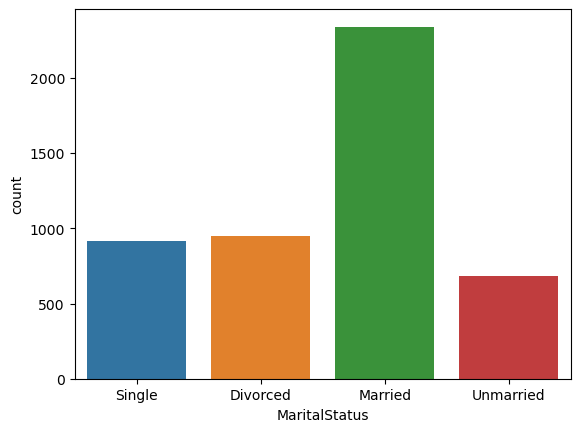

In [11]:
sns.countplot(data=df,x='MaritalStatus')

In [12]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

<Axes: xlabel='TypeofContact', ylabel='count'>

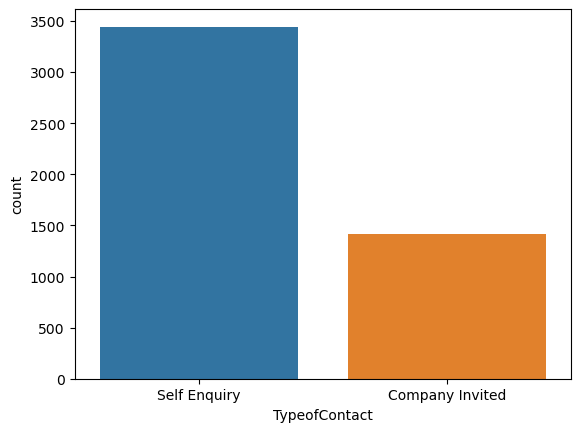

In [13]:
sns.countplot(data=df,x='TypeofContact')

In [14]:
df['Gender']=df['Gender'].replace('Fe Male','Female')
df['MaritalStatus']=df['MaritalStatus'].replace('Single','Unmarried')

In [15]:
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [16]:
## check the missing values
## these are the feature with nun value
feature_with_na=[feature for feature in df.columns if df[feature].isna().sum()>=1]
for feature in feature_with_na:
    print(feature,np.round(df[feature].isna().mean()*100,5),'% missing values')

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [17]:
# satatistic on numerical columns (null col)
df[feature_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


# imputing null values
1. impute median values for age column
2. impute mode for type of contact
3. Impute Median for Duration of Pitch
4.  Impute Mode for Numberoffollowup as it is Discrete feature 
5.   Impute Mode for PreferredProperty Star 
6.   Impute Median for NumberofTrips 
7.   Impute Mode for NumberOfChildrenVisiting 
8.    Impute Median for Monthlylncome

In [18]:
# age 
df.Age.fillna(df.Age.median(),inplace=True)

# type of contact
df.TypeofContact.fillna(df.TypeofContact.mode()[0],inplace=True)

#durationofpitch
df.DurationOfPitch.fillna(df.DurationOfPitch.median(),inplace=True)

# NUmber of followship
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0],inplace=True)

#Prefferd [ropertystar
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0],inplace=True)

#Number of trip
df.NumberOfTrips.fillna(df.NumberOfTrips.median(),inplace=True)

#number of children visiting
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0],inplace=True)

#monthly Income
df.MonthlyIncome.fillna(df.MonthlyIncome.median(),inplace=True)

In [19]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [20]:
df.isna().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [21]:
df.drop('CustomerID',inplace=True,axis=1)

# feature engineering

## feature extraction

In [22]:
# creating new column for feature
df['TotalVisiting']=df['NumberOfPersonVisiting']+ df['NumberOfChildrenVisiting']
df.drop(columns=['NumberOfPersonVisiting','NumberOfChildrenVisiting'],axis=1,inplace=True)

In [23]:
## get all the numeric features
num_feature=[feature for feature in df.columns if df[feature].dtype!='O']
print('Num of Numerical Feature:', len(num_feature))

Num of Numerical Feature: 12


In [24]:
# categorical feature
cat_feature=[feature for feature in df.columns if df[feature].dtype=='O']
print('Num of categorical Feature:', len(cat_feature))

Num of categorical Feature: 6


In [25]:
# discreat feature
discrete_feature=[feature for feature in num_feature if len(df[feature].unique())<=25]

print('Num of discrete Feature:', len(discrete_feature))

Num of discrete Feature: 9


In [26]:
# contionuous features
continuous_feature=[feature for feature in num_feature if feature not in discrete_feature]
print('Num of contionuous Feature:', len(continuous_feature))


Num of contionuous Feature: 3


In [27]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


# train test split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X=df.drop(['ProdTaken'],axis=1)
y=df['ProdTaken']

In [30]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [31]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [33]:
X_train.shape,X_test.shape

((3666, 17), (1222, 17))

In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4888 non-null   float64
 1   TypeofContact           4888 non-null   object 
 2   CityTier                4888 non-null   int64  
 3   DurationOfPitch         4888 non-null   float64
 4   Occupation              4888 non-null   object 
 5   Gender                  4888 non-null   object 
 6   NumberOfFollowups       4888 non-null   float64
 7   ProductPitched          4888 non-null   object 
 8   PreferredPropertyStar   4888 non-null   float64
 9   MaritalStatus           4888 non-null   object 
 10  NumberOfTrips           4888 non-null   float64
 11  Passport                4888 non-null   int64  
 12  PitchSatisfactionScore  4888 non-null   int64  
 13  OwnCar                  4888 non-null   int64  
 14  Designation             4888 non-null   

In [35]:
# create columns transform with 3 types of transformers
cat_feature=X.select_dtypes(include='object').columns
num_feature=X.select_dtypes(exclude='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer= OneHotEncoder(drop='first')

preprocessor=ColumnTransformer(
    [
        ('OneHotEncoder',oh_transformer,cat_feature),
        ('StandardScaler',numeric_transformer,num_feature)

    ]
)

In [36]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object'))])

In [37]:
# applying transformation in train(fit_transform)
X_train=preprocessor.fit_transform(X_train)

In [38]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721708,-0.653318,0.277912,1.777611,2.053422,1.575272,0.681958,-1.273702,-0.415942,-0.058810
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,-0.721708,-0.165525,-0.723883,-0.724971,-0.670111,-0.634811,1.409353,0.785113,-0.224146,-0.768009
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.721708,-0.287473,1.279708,0.526320,1.508716,-0.634811,0.681958,0.785113,-0.711215,-0.768009
3,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.454995,-0.531370,0.277912,1.777611,-0.670111,-0.634811,1.409353,0.785113,0.057482,-0.058810
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.721708,0.322268,-0.723883,-0.724971,-0.670111,1.575272,0.681958,0.785113,-1.139911,-0.058810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3661,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721708,-0.653318,1.279708,-0.724971,-0.670111,-0.634811,-1.500228,0.785113,-0.531928,0.650390
3662,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.454995,-0.897214,-0.723883,1.777611,-1.214818,-0.634811,1.409353,0.785113,1.528543,-0.058810
3663,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.454995,1.541750,0.277912,-0.724971,2.053422,-0.634811,-0.772833,0.785113,-0.356053,0.650390
3664,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.454995,1.785647,1.279708,-0.724971,-0.125404,-0.634811,-1.500228,0.785113,-0.248595,0.650390


In [39]:
X_test=preprocessor.transform(X_test)

In [40]:
X_test

array([[ 0.        ,  0.        ,  0.        , ..., -1.27370232,
        -0.73187289, -0.76800938],
       [ 1.        ,  0.        ,  0.        , ..., -1.27370232,
        -0.664972  , -0.05880979],
       [ 1.        ,  0.        ,  0.        , ...,  0.7851128 ,
        -0.41613103, -0.76800938],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.7851128 ,
        -0.22414633, -0.76800938],
       [ 1.        ,  0.        ,  0.        , ...,  0.7851128 ,
        -0.53515017,  1.35958941],
       [ 1.        ,  0.        ,  0.        , ...,  0.7851128 ,
        -1.1984734 , -0.76800938]])

In [41]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay,  precision_score, recall_score, f1_score, roc_auc_score,roc_curve

In [46]:
models={
    'Logistic Regression':LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),
    'Gradiant Boost':GradientBoostingClassifier(),
    'Adaboost':AdaBoostClassifier()
}


In [57]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)# train model

# make predictions
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

# training set performance
    model_train_accuracy=accuracy_score(y_train,y_train_pred)#calculate accuracy
    model_train_f1=f1_score(y_train,y_train_pred,average='weighted')#calculate F1 score
    model_train_precision=precision_score(y_train,y_train_pred)#calculate precision
    model_train_recall=recall_score(y_train,y_train_pred)#calculate recall
    model_train_rocauc_score=roc_auc_score(y_train,y_train_pred)#calculate rocauc
    
    # test set performance
    model_test_accuracy=accuracy_score(y_test,y_test_pred)#calculate accuracy
    model_test_f1=f1_score(y_test,y_test_pred,average='weighted')#calculate F1 score
    model_test_precision=precision_score(y_test,y_test_pred)#calculate precision
    model_test_recall=recall_score(y_test,y_test_pred)#calculate recall
    model_test_rocauc_score=roc_auc_score(y_test,y_test_pred)#calculate rocauc
    
    
    print(list(models.keys())[i])
    print('model performance for training set')
    print('- Accuracy: {:.4f}'.format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- roc auc score: {:.4f}'.format(model_train_rocauc_score))


    print('------------------------------')
    
    print('model performance for test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    
    print('- precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- roc auc score: {:.4f}'.format(model_test_rocauc_score))
    
    print('='*35)
    print('\n')



Logistic Regression
model performance for training set
- Accuracy: 0.8432
- F1 score: 0.8164
- precision: 0.7061
- Recall: 0.2999
- roc auc score: 0.6353
------------------------------
model performance for test set
- Accuracy: 0.8445
- F1 score: 0.8209
- precision: 0.6571
- Recall: 0.3094
- roc auc score: 0.6367


Decision Tree
model performance for training set
- Accuracy: 1.0000
- F1 score: 1.0000
- precision: 1.0000
- Recall: 1.0000
- roc auc score: 1.0000
------------------------------
model performance for test set
- Accuracy: 0.9075
- F1 score: 0.9082
- precision: 0.7371
- Recall: 0.7668
- roc auc score: 0.8529


Random Forest
model performance for training set
- Accuracy: 1.0000
- F1 score: 1.0000
- precision: 1.0000
- Recall: 1.0000
- roc auc score: 1.0000
------------------------------
model performance for test set
- Accuracy: 0.9247
- F1 score: 0.9181
- precision: 0.9517
- Recall: 0.6188
- roc auc score: 0.8059


Gradiant Boost
model performance for training set
- Accuracy:

In [72]:
# hyperparameter training
rf_params={'max_depth':[5,8,15,None,10],
           'max_features':[5,7,'auto',8],
           'min_samples_split':[2,8,15,10],
           'n_estimators':[100,200,500,1000]}
adaboost_params={
    'n_estimators':[50,60,70,80,90],
    'algorithm':['SAME','SAMME.R']
}

In [73]:
rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 10],
 'n_estimators': [100, 200, 500, 1000]}

In [74]:
adaboost_params

{'n_estimators': [50, 60, 70, 80, 90], 'algorithm': ['SAME', 'SAMME.R']}

In [75]:
# models list for hyperparameter tunning
randomcv_models=[
                 ('RF',RandomForestClassifier(),rf_params),
    ('AB',AdaBoostClassifier(),adaboost_params)]

In [76]:
from sklearn.model_selection import RandomizedSearchCV

In [78]:
model_param={}
for name ,model,params in randomcv_models:
    random=RandomizedSearchCV(estimator=model,param_distributions=params,n_iter=100,cv=3,verbose=2,n_jobs=-1)
    random.fit(X_train,y_train)
    model_param[name]=random.best_params_

for model_name in model_param:
    print(f'----------best params for {model_name}-----------')
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 124, in fit
    self._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site

----------best params for RF-----------
{'n_estimators': 200, 'min_samples_split': 2, 'max_features': 7, 'max_depth': 15}
----------best params for AB-----------
{'n_estimators': 80, 'algorithm': 'SAMME.R'}


In [79]:
models={
    'Random Forest':RandomForestClassifier(n_estimantors=200,min_smaples_split=2,
                                           max_features=7,max_depth=15),
    'Adaboost':AdaBoostClassifier(n_estimators=80,algorithm='SAMME.R')

}


TypeError: RandomForestClassifier.__init__() got an unexpected keyword argument 'n_estimantors'

In [80]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)# train model

# make predictions
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

# training set performance
    model_train_accuracy=accuracy_score(y_train,y_train_pred)#calculate accuracy
    model_train_f1=f1_score(y_train,y_train_pred,average='weighted')#calculate F1 score
    model_train_precision=precision_score(y_train,y_train_pred)#calculate precision
    model_train_recall=recall_score(y_train,y_train_pred)#calculate recall
    model_train_rocauc_score=roc_auc_score(y_train,y_train_pred)#calculate rocauc
    
    # test set performance
    model_test_accuracy=accuracy_score(y_test,y_test_pred)#calculate accuracy
    model_test_f1=f1_score(y_test,y_test_pred,average='weighted')#calculate F1 score
    model_test_precision=precision_score(y_test,y_test_pred)#calculate precision
    model_test_recall=recall_score(y_test,y_test_pred)#calculate recall
    model_test_rocauc_score=roc_auc_score(y_test,y_test_pred)#calculate rocauc
    
    
    print(list(models.keys())[i])
    print('model performance for training set')
    print('- Accuracy: {:.4f}'.format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- roc auc score: {:.4f}'.format(model_train_rocauc_score))


    print('------------------------------')
    
    print('model performance for test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    
    print('- precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- roc auc score: {:.4f}'.format(model_test_rocauc_score))
    
    print('='*35)
    print('\n')

Logistic Regression
model performance for training set
- Accuracy: 0.8432
- F1 score: 0.8164
- precision: 0.7061
- Recall: 0.2999
- roc auc score: 0.6353
------------------------------
model performance for test set
- Accuracy: 0.8445
- F1 score: 0.8209
- precision: 0.6571
- Recall: 0.3094
- roc auc score: 0.6367


Decision Tree
model performance for training set
- Accuracy: 1.0000
- F1 score: 1.0000
- precision: 1.0000
- Recall: 1.0000
- roc auc score: 1.0000
------------------------------
model performance for test set
- Accuracy: 0.9002
- F1 score: 0.9015
- precision: 0.7113
- Recall: 0.7623
- roc auc score: 0.8466


Random Forest
model performance for training set
- Accuracy: 1.0000
- F1 score: 1.0000
- precision: 1.0000
- Recall: 1.0000
- roc auc score: 1.0000
------------------------------
model performance for test set
- Accuracy: 0.9304
- F1 score: 0.9252
- precision: 0.9481
- Recall: 0.6547
- roc auc score: 0.8234


Gradiant Boost
model performance for training set
- Accuracy: